In [1]:
# from n_mirror_cavity_classes import Mirror, Propagation, Subcavity, Cavity
# from n_mirror_cavity_classes_bis import Mirror, Subcavity, Cavity
from n_mirror_cavity_classes_ter import Mirror, Subcavity, Cavity_sym, Cavity_num
from sympy import Symbol, symbols, Derivative
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
sp.init_printing(use_unicode=True)
sp.init_session(quiet=True)
from scipy.signal import find_peaks
%matplotlib inline

In [560]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")

dL = 200e-6
subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
subs_dict_num = {L1: 1-dL, delta1:0, L2:dL, delta2: 0}
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
# mirror_vals = {t1: 0.1, t2: 0.1, t3: 0.1}
mirror_vals = {t1: 50e-6, t2: 10e-6, t3: 1e-6}
# 10 ppm
cavity_sym = Cavity_sym(mirror_ts, subs_dict)

cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)



In [561]:
total_length = subs_dict_num.get(L1) + subs_dict_num.get(L2)
fsr = 3e8/(2*total_length)
# nu_range = np.linspace(-fsr/10, fsr/10, 1000)

print(fsr)
print(nu_range.max())

150000000.0
50000000.0


In [562]:
nu_range = np.linspace(-50e6, 50e6, 1000)
ranges, values, res_1, res_2 = cavity.transmitted_power([nu_range]) # necessarily pass k first and in []
print(res_1, res_2)

33648690.08349426 -33648690.083494306


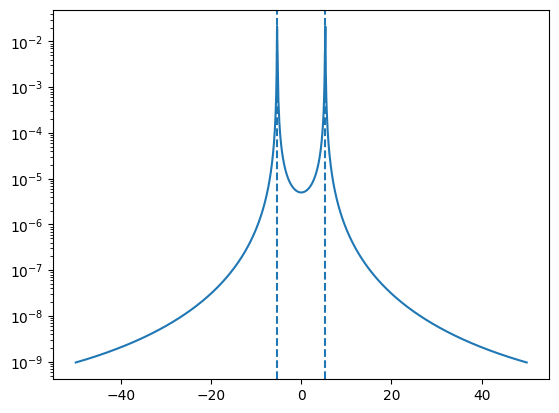

In [563]:
plt.plot(ranges / (2*np.pi) * 1e-6, values)
plt.axvline(res_1 /(2*np.pi) * 1e-6, linestyle = "dashed")
plt.axvline(res_2 /(2*np.pi) * 1e-6, linestyle = "dashed")
# it worries me it doesnt show the vertical shift though.....
plt.yscale("log")

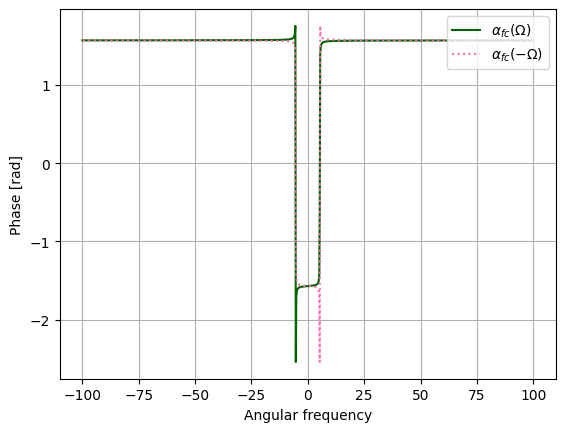

In [541]:
ranges, values, func = cavity.phase_response([nu_range])
plt.plot(ranges / (2*np.pi) * 1e-6, values, c = "darkgreen", label = r"$\alpha_{fc}(\Omega)$")
plt.plot(-ranges / (2*np.pi) * 1e-6, values, c = "hotpink", linestyle = "dotted", label = r"$\alpha_{fc}(-\Omega)$")
plt.ylabel("Phase [rad]")
plt.xlabel("Angular frequency")
plt.grid()
plt.legend(loc = 1)

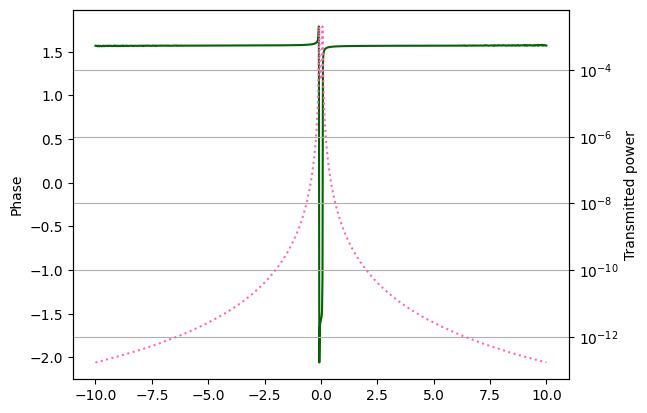

In [519]:
fig, ax1 = plt.subplots()
ax1.plot(ranges/ (2*np.pi) * 1e-6, values, c = "darkgreen", label = "alpha_fc")

ax2 = ax1.twinx()
ranges, values, _, _ = cavity.transmitted_power([nu_range])
ax2.plot(ranges/ (2*np.pi) * 1e-6, values, c = "hotpink", linestyle = "dotted")
ax2.set_ylabel("Transmitted power")

ax2.set_yscale("log")
ax1.set_ylabel("Phase")
plt.xlabel("Angular freqency")
# plt.xlim([-0.5e9, 0.5e9])
plt.grid()
plt.show()

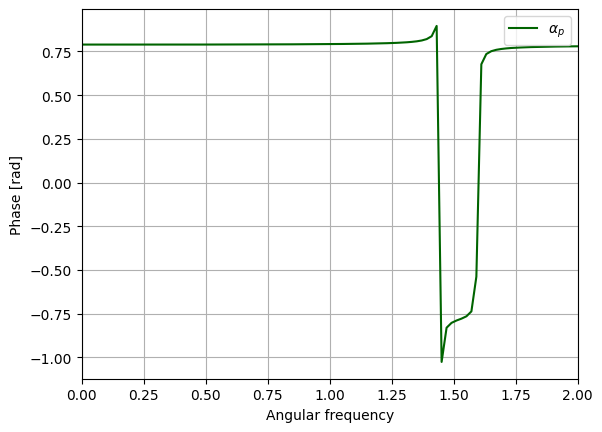

In [520]:
# nu_range = np.linspace(-200e6, 200e6, 3000) #needs to take negative vals to find the peaks
omega_range = nu_range * 2 * np.pi 
detuning = 10e6
# omegas defined symmetrically wrt to empty cavity freq

ranges, values = cavity.folded_spectrum([nu_range], detuning)

plt.plot(ranges/ (2*np.pi) * 1e-6, values  - np.pi/4, c = "darkgreen", label = r"$\alpha_p$") #note i am manually shifting the spectrum here so it fits pi/2
plt.ylabel("Phase [rad]")
plt.xlabel("Angular frequency")
plt.legend()
plt.grid()
plt.xlim([0, 2])


# macroscopic variation total L = 1m, L1 = L2 to L1 >> L2, L2 >> L1
# back mirror is almost t = 1e-6, t1, t2 = 50e-6 - 0.5 

In [431]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")

subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
mirror_vals = {t1: 0.1, t2: 0.1, t3: 5e-6}
nu_range = np.linspace(-120e6, 120e6, 1000)
detuning = 2e6

L1_array = np.linspace(0.5, 0.01, 10)
L2_array = 1 - L1_array

cmap = plt.get_cmap("Greens")
colors = cmap(np.linspace(0.2, 1, len(L1_array)))  # Avoid too-light colors

# Plot with color gradient
plt.figure(figsize=(8, 6))
for idx, (i, j) in enumerate(zip(L1_array, L2_array)):
    subs_dict_num = {L1: i, delta1: 0, L2: j, delta2: 0}
    cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)
    
    ranges, values = cavity.folded_spectrum([new_range], detuning)
    plt.plot(ranges / (2*np.pi) * 1e-6, values, color=colors[idx])

plt.xlim((0, max(nu_range)*1e-6))

NameError: name 'new_range' is not defined

<Figure size 800x600 with 0 Axes>

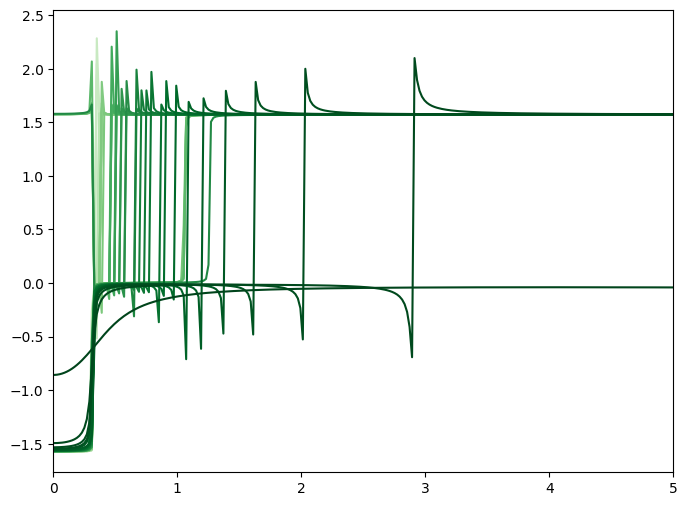

In [481]:
t1, t2, t3 = symbols("t1 t2 t3")

L, delta, omega, L1, L2, delta1, delta2 = symbols("L delta omega L1 L2 delta1 delta2")

subs_dict = [{L: L1, delta: delta1}, {L: L2, delta: delta2}]
mirror_ts = [t1, t2, t3]
lambdify_vars = [omega]
mirror_vals = {t1: 50e-6, t2: 50e-6, t3: 1e-6}
nu_range = np.linspace(-10e6, 10e6, 1000)
detuning = 2e6

L1_array = np.linspace(0.5, 0.001, 50)
L2_array = 1- L1_array
cmap = plt.get_cmap("Greens")
colors = cmap(np.linspace(0.2, 1, len(L1_array)))  # Avoid too-light colors

plt.figure(figsize=(8, 6))
for idx, (i, j) in enumerate(zip(L1_array, L2_array)):
    subs_dict_num = {L1: i, delta1: 0, L2: j, delta2: 0}
    cavity = Cavity_num(mirror_ts, mirror_vals, subs_dict, subs_dict_num, lambdify_vars)

    total_length = i + j 
    fsr = 3e8 / (2 * total_length) 
    ranges, values = cavity.folded_spectrum([nu_range], detuning)
    
    plt.plot(ranges / (2*np.pi) * 1e-6, values, color=colors[idx])

plt.xlim([0, 5])
plt.title("")

# two resonances closer than 1 mega
# plot alpha p with negative & negative detuning for both resonance

In [ ]:
L1, L2, delta1, delta2, T1, T2, T3, wavelength, k = symbols("L1 L2 delta1 delta2 T1 T2 T3 lambda1 k")


new_subs = {L1: 1, L2: 1}
new_variables = [k, delta1, delta2, T1, T2, T3]

transfer_matrix = cavity.transfer_matrix()



t_coef = (transfer_matrix[0, 0]*transfer_matrix[1, 1] - transfer_matrix[0, 1]*transfer_matrix[1, 0]) / transfer_matrix[1, 1]
t_coef = t_coef.subs([(wavelength, 2 * np.pi / (Symbol("k")*3e6+ 20e6))])

t_coef_subbed = t_coef.subs(new_subs)
t_coef_func = sp.lambdify(new_variables, t_coef_subbed)


def phase_resp(k, d1, d2, t1, t2, t3):
    return np.angle((t_coef_func(k, d1, d2, t1, t2, t3) + t_coef_func(-k, d1, d2, t1, t2, t3)) / 2)



AttributeError: 'Cavity_num' object has no attribute 'transfer_matrix'

In [ ]:
initial_guess = [50e-9, 50e-9, 0.1, 0.1, 0.1]


bounds_lower = [0] * len(cavity.subcavities) + [0] * len(cavity.mirrors)
bounds_upper = [500e-9] * len(cavity.subcavities) + [1] * len(cavity.mirrors)

# Correct bounds tuple
bounds = (bounds_lower, bounds_upper)


# Fit the phase response
x, target_response, a = c.target_phase_response(P, m, F, L, omega_m, Q, 1064e-9, omega_arr)

# Run the curve fitting
optimized_params, _ = curve_fit(phase_resp, omega_arr, target_response, p0=initial_guess, bounds=bounds)


# Print the results
print("Optimized Transmittivities and Length Offsets:", optimized_params)

In [46]:
L, delta, wavelength, k = symbols("L delta lambda k")

mirror_transmissivities = [sp.Symbol("T1"), sp.Symbol("T2"), sp.Symbol("T3")]
subs_dict = [
    {L: sp.Symbol("L1"), delta: sp.Symbol("delta1"), wavelength: sp.Symbol("lambda")},
    {L: sp.Symbol("L2"), delta: sp.Symbol("delta2"), wavelength: sp.Symbol("lambda")},
]


cavity = Cavity(mirror_transmissivities, subs_dict)

NameError: name 'Cavity' is not defined

In [ ]:
L1, L2, delta1, delta2, T1, T2, T3, wavelength, k = symbols("L1 L2 delta1 delta2 T1 T2 T3 lambda1 k")
subs = {L1: 1, L2: 1, delta1 : 0, delta2: 50e-9, T1: 0.1, T2: 0.1, T3:0.1, wavelength: 2 * sp.pi/k}
variable = [k]
function = cavity.transmitted_power(subs, variable)

In [ ]:
# wavelength_range = np.linspace(-75e6* 2 * np.pi / 3e8, 75e6* 2 * np.pi / 3e8, 1000)

wavelength_range = np.linspace(5906192.35217376, 5906195.49376641, 1000)

vals = function(wavelength_range)

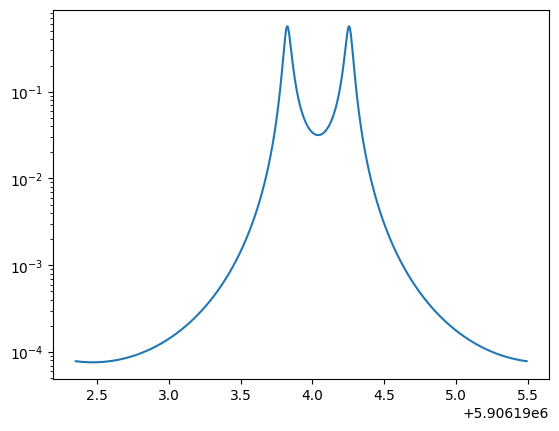

In [5]:
plt.plot(wavelength_range, vals)
plt.yscale("log")

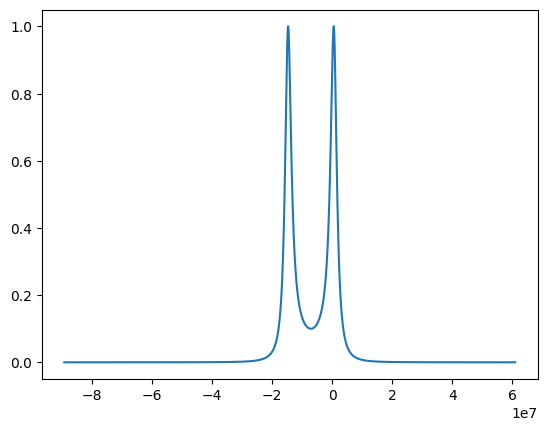

In [6]:
freq_range = np.linspace(-75e6, 75e6, 10000)
freqs, vals = cavity.transmitted_power_plot(subs, variable, freq_range)
plt.plot(freqs, vals)

In [7]:
for j in range(10):

    L1, L2, delta1, delta2, T1, T2, T3, wavelength, k = symbols("L1 L2 delta1 delta2 T1 T2 T3 lambda1 k")
    subs = {L1: 1, L2: 1, delta1 : 0, delta2: j*5e-9, T1: 0.1, T2: 0.1, T3:0.1, wavelength: 2 * sp.pi/k}
    variable = [k]
    function = cavity.transmitted_power(subs, variable)

    phase_freq_range = np.linspace(-200e6, 200e6, 1000)
    freqs, phase, phase_func = cavity.phase_response(subs, variable, 20e6, phase_freq_range)
    plt.plot(freqs, phase)

# plot phase and intensity on the same plot

TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable exp method

TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable exp method

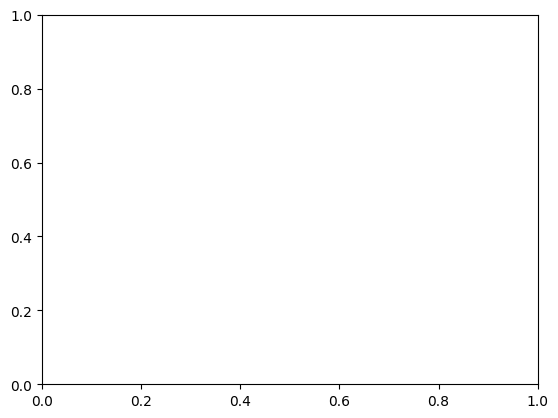

In [8]:
fig, ax1 = plt.subplots()
phase_freq_range = np.linspace(0, 400e6, 1000)
freqs, phase, phase_func = cavity.phase_response(subs, variable, 20e6, phase_freq_range)
ax1.plot(freqs, phase, c = "darkgreen")

ax2 = ax1.twinx()
freq_range = np.linspace(0, 400e6, 1000)
freqs, vals = cavity.transmitted_power_plot(subs, variable, freq_range)
ax2.plot(freqs, vals, c = "hotpink")


ax2.set_yscale("log")
plt.xlim([0, 2e8])
plt.grid()
plt.show()

In [16]:
L1, L2, delta1, delta2, T1, T2, T3, wavelength, k = symbols("L1 L2 delta1 delta2 T1 T2 T3 lambda1 k")


new_subs = {L1: 1, L2: 1}
new_variables = [k, delta1, delta2, T1, T2, T3]

transfer_matrix = cavity.transfer_matrix()



t_coef = (transfer_matrix[0, 0]*transfer_matrix[1, 1] - transfer_matrix[0, 1]*transfer_matrix[1, 0]) / transfer_matrix[1, 1]
t_coef = t_coef.subs([(wavelength, 2 * sp.pi / (Symbol("k")*3e6 + 20e6))])

t_coef_subbed = t_coef.subs(new_subs)
t_coef_func_pos = sp.lambdify(new_variables, t_coef_subbed)


def phase_resp(k, d1, d2, t1, t2, t3):
    return np.angle((t_coef_func(k, d1, d2, t1, t2, t3) + t_coef_func(-k, d1, d2, t1, t2, t3)) / 2)


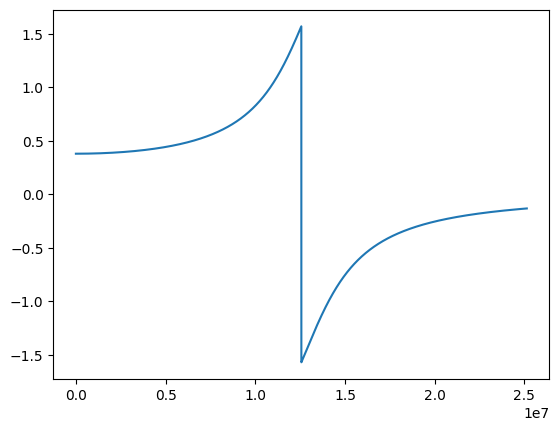

In [17]:
P = 1e-3
m = 10e-9
F = 1000
Q = 100e6
L = 1e-3
# kappaOM = fsrOM/F
omega_m = 2e6 * 2 * np.pi
omega_arr = np.linspace(0, 2 * np.pi * 4e6, 10000)

c = Cavity(mirror_transmissivities, subs_dict)

omegas, values, K_func = c.target_phase_response(P, m, F, L, omega_m, Q, 1064e-9, omega_arr)
plt.plot(omegas, values)
# list_F = np.linspace(100, 100000, 100)
# for f in list_F : 
    # c = Cavity(mirror_transmissivities, subs_dict)
    # kappaOM = fsrOM / f
    # c.target_phase_response(P, m, f, L, kappaOM, omega_m, damping, 1064e-9, omega_arr)

In [13]:
initial_guess = [50e-9, 50e-9, 0.1, 0.1, 0.1]


bounds_lower = [0] * len(cavity.subcavities) + [0] * len(cavity.mirrors)
bounds_upper = [500e-9] * len(cavity.subcavities) + [1] * len(cavity.mirrors)

# Correct bounds tuple
bounds = (bounds_lower, bounds_upper)


# Fit the phase response
target_response = c.target_phase_response(P, m, F, L, omega_m, Q, 1064e-9, omega_arr)

# Run the curve fitting
optimized_params, _ = curve_fit(phase_resp, omega_arr, target_response, p0=initial_guess, bounds=bounds)


# Print the results
print("Optimized Transmittivities and Length Offsets:", optimized_params)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [ ]:
L1, L2, delta1, delta2, T1, T2, T3, wavelength, k = symbols("L1 L2 delta1 delta2 T1 T2 T3 lambda1 k")


new_subs = {L1: 1, L2: 1}
new_variables = [k, delta1, delta2, T1, T2, T3]

transfer_matrix = cavity.transfer_matrix()



t_coef = (transfer_matrix[0, 0]*transfer_matrix[1, 1] - transfer_matrix[0, 1]*transfer_matrix[1, 0]) / transfer_matrix[1, 1]
t_coef = t_coef.subs([(wavelength, 2 * np.pi / (Symbol("k")*3e6+ 20e6))])

t_coef_subbed = t_coef.subs(new_subs)
t_coef_func = sp.lambdify(new_variables, t_coef_subbed)


def phase_resp(k, d1, d2, t1, t2, t3):
    return np.angle((t_coef_func(k, d1, d2, t1, t2, t3) + t_coef_func(-k, d1, d2, t1, t2, t3)) / 2)


In [19]:
initial_guess = [50e-9, 50e-9, 0.1, 0.1, 0.1]


bounds_lower = [0] * len(cavity.subcavities) + [0] * len(cavity.mirrors)
bounds_upper = [500e-9] * len(cavity.subcavities) + [1] * len(cavity.mirrors)

# Correct bounds tuple
bounds = (bounds_lower, bounds_upper)


# Fit the phase response
x, target_response, a = c.target_phase_response(P, m, F, L, omega_m, Q, 1064e-9, omega_arr)

# Run the curve fitting
optimized_params, _ = curve_fit(phase_resp, omega_arr, target_response, p0=initial_guess, bounds=bounds)


# Print the results
print("Optimized Transmittivities and Length Offsets:", optimized_params)

Optimized Transmittivities and Length Offsets: [5.71150585e-08 5.71150586e-08 5.13799414e-02 1.05861004e-01
 5.13799452e-02]


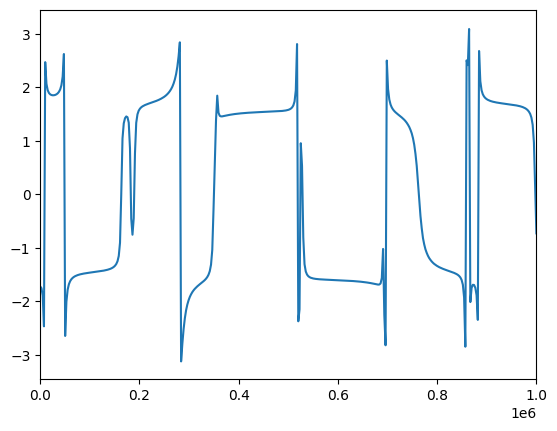

In [ ]:
d1, d2, t1, t2, t3 = 5.71150585e-08, 5.71150586e-08, 5.13799414e-02,  1.05861004e-01, 5.13799452e-02

vals = phase_resp(omega_arr, 50e-9, 0, 0.1, 0.1, 0.1)

plt.plot(omega_arr, vals)
plt.xlim([0, 0.1e7])

# range delta - FSR to FSR - delta
# plot alpha fc ad aplha p

In [ ]:
# code from paul


L_1 = np.floor(L_1_macro/wavelength)*wavelength+delta
L_2 = np.floor(L_2_macro/wavelength)*wavelength

phi_1 = -2*np.pi*(nu+c/wavelength)*L_1/c         # first phase factor
phi_2 = -2*np.pi*(nu+c/wavelength)*L_2/c         # second phase factor
    
P_in = 1                          # input power (watts)
    
phi_1_it = phi_1 + delta_phi_it   # basic phase factor + specific phase shift
phi_2_it = phi_2 + delta_phi_it   # basic phase factor + specific phase shift
    
it_trans_upper = -t_1*t_2*t_3*np.exp(1j*phi_1_it)*np.exp(1j*phi_2_it)
it_trans_lower = np.exp(2j*phi_1_it)*np.exp(2j*phi_2_it) - r_1*r_2*np.exp(2j*phi_2_it) - r_2*r_3*np.exp(2j*phi_1_it) + r_1*r_3*(t_2**2 + r_2**2)
it_trans = it_trans_upper / it_trans_lower
    
it_ref_upper = r_1*np.exp(2j*phi_1_it)*np.exp(2j*phi_2_it) - r_1*r_2*r_3*np.exp(2j*phi_1_it) - r_2*(r_1**2 + t_1**2)*np.exp(2j*phi_2_it) + r_3*(r_1**2 + t_1**2)*(r_2**2 + t_2**2)
it_ref_lower = np.exp(2j*phi_1_it)*np.exp(2j*phi_2_it) - r_1*r_2*np.exp(2j*phi_2_it) - r_2*r_3*np.exp(2j*phi_1_it) + r_1*r_3*(r_2**2 + t_2**2)
it_ref = it_ref_upper / it_ref_lower

NameError: name 'L_1_macro' is not defined